In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import config

pd.set_option('display.max_rows', 120)
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = (20, 15)

print(Path.cwd())

/home/sergey/mnt/st1500/Usr/Sergey/TheJob/Otus/ML_advanced2020/home_works/1. Auto_ML/drivendata_flu_shot


In [2]:

train_set = pd.read_csv("./input/training_set_features.csv", index_col='respondent_id')
train_labels = pd.read_csv("./input/training_set_labels.csv")
submission_format = pd.read_csv("./input/submission_format.csv")
test_set = pd.read_csv("./input/test_set_features.csv")

train_set.shape (26707, 35)
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_st

<AxesSubplot:>

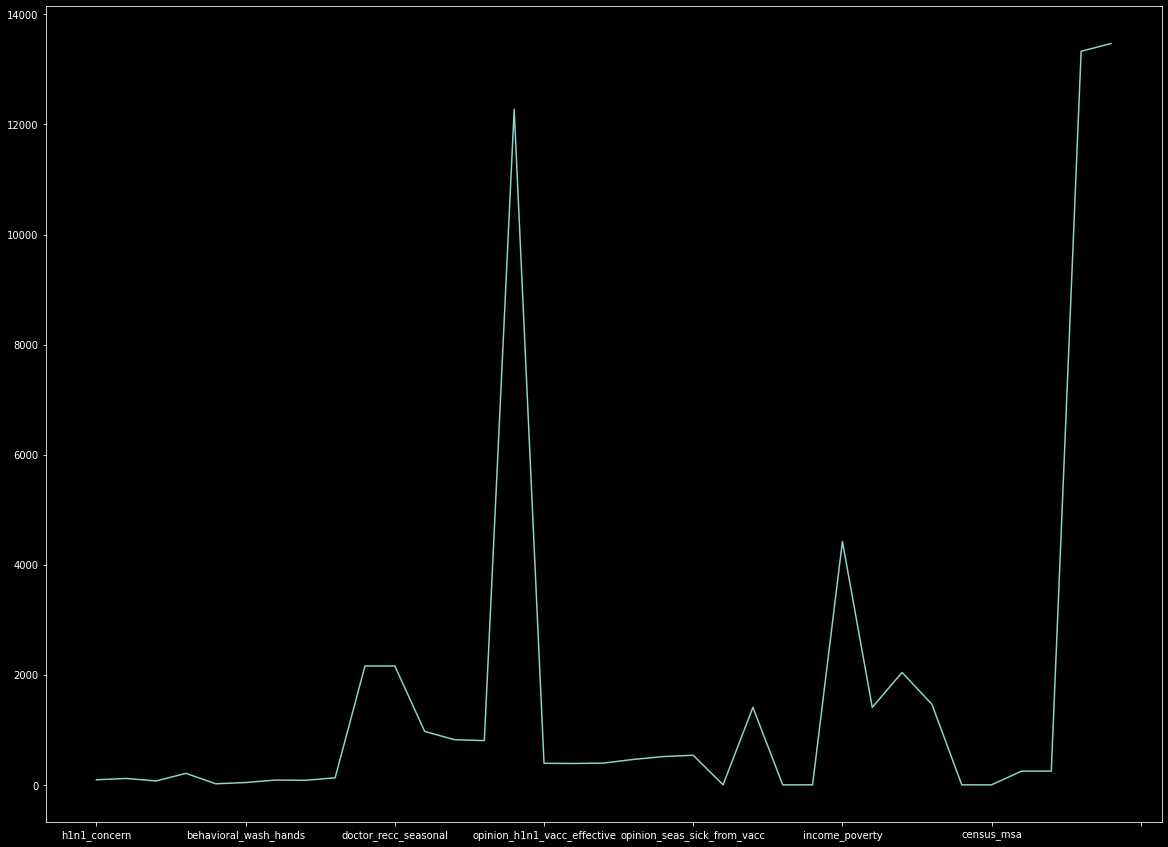

In [3]:
print("train_set.shape", train_set.shape)
nans_count = train_set.shape[0] - train_set.count()
print(nans_count)
nans_count.plot()

In [4]:
train_set.fillna(value="-1", inplace=True)
train_set.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,-1,-1
1,3,2,0,1,0,1,0,1,1,0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
2,1,1,0,1,0,0,0,0,0,-1,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
3,1,1,0,1,0,1,1,0,0,0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,-1,-1
4,2,1,0,1,0,1,1,0,1,0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb


In [5]:
for col in train_set:
    print(col)
    print('    ', train_set[col].unique())

h1n1_concern
     [1.0 3.0 2.0 0.0 '-1']
h1n1_knowledge
     [0.0 2.0 1.0 '-1']
behavioral_antiviral_meds
     [0.0 1.0 '-1']
behavioral_avoidance
     [0.0 1.0 '-1']
behavioral_face_mask
     [0.0 1.0 '-1']
behavioral_wash_hands
     [0.0 1.0 '-1']
behavioral_large_gatherings
     [0.0 1.0 '-1']
behavioral_outside_home
     [1.0 0.0 '-1']
behavioral_touch_face
     [1.0 0.0 '-1']
doctor_recc_h1n1
     [0.0 '-1' 1.0]
doctor_recc_seasonal
     [0.0 '-1' 1.0]
chronic_med_condition
     [0.0 1.0 '-1']
child_under_6_months
     [0.0 1.0 '-1']
health_worker
     [0.0 1.0 '-1']
health_insurance
     [1.0 '-1' 0.0]
opinion_h1n1_vacc_effective
     [3.0 5.0 4.0 2.0 1.0 '-1']
opinion_h1n1_risk
     [1.0 4.0 3.0 2.0 5.0 '-1']
opinion_h1n1_sick_from_vacc
     [2.0 4.0 1.0 5.0 3.0 '-1']
opinion_seas_vacc_effective
     [2.0 4.0 5.0 3.0 1.0 '-1']
opinion_seas_risk
     [1.0 2.0 4.0 3.0 5.0 '-1']
opinion_seas_sick_from_vacc
     [2.0 4.0 1.0 5.0 '-1' 3.0]
age_group
     ['55 - 64 Years' '35 - 44 Yea

In [6]:
print(f"train_labels.shape {train_labels.shape}")
print(f"train_labels.count()")
print(train_labels.count())

train_labels.shape (26707, 3)
train_labels.count()
respondent_id       26707
h1n1_vaccine        26707
seasonal_vaccine    26707
dtype: int64


In [8]:
for col in config.ordinal:
    uniques = train_set[col].unique().astype(dtype=str)
    print(col)
    for u in uniques:
        print(f"  {u}")

h1n1_concern
  1.0
  3.0
  2.0
  0.0
  -1
h1n1_knowledge
  0.0
  2.0
  1.0
  -1
opinion_h1n1_vacc_effective
  3.0
  5.0
  4.0
  2.0
  1.0
  -1
opinion_h1n1_risk
  1.0
  4.0
  3.0
  2.0
  5.0
  -1
opinion_h1n1_sick_from_vacc
  2.0
  4.0
  1.0
  5.0
  3.0
  -1
opinion_seas_vacc_effective
  2.0
  4.0
  5.0
  3.0
  1.0
  -1
opinion_seas_risk
  1.0
  2.0
  4.0
  3.0
  5.0
  -1
opinion_seas_sick_from_vacc
  2.0
  4.0
  1.0
  5.0
  -1
  3.0
age_group
  55 - 64 Years
  35 - 44 Years
  18 - 34 Years
  65+ Years
  45 - 54 Years
education
  < 12 Years
  12 Years
  College Graduate
  Some College
  -1
income_poverty
  Below Poverty
  <= $75,000, Above Poverty
  > $75,000
  -1
household_adults
  0.0
  2.0
  1.0
  3.0
  -1
household_children
  0.0
  3.0
  2.0
  1.0
  -1


In [9]:
train_set.age_group.unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [10]:
ordinal_to_replace = {
    # age_groups
    '18 - 34 Years': 1,
    '35 - 44 Years': 2,
    '45 - 54 Years': 3,
    '55 - 64 Years': 4,
    '65+ Years': 5,

    # educations = {
    '-1': -1,
    '< 12 Years': 1,
    'Some College': 2,
    '12 Years': 3,
    'College Graduate': 4,

    # income_poverties
    '-1': -1,
    'Below Poverty': 1,
    '<= $75,000, Above Poverty': 2,
    '> $75,000': 3,
}
train_set.replace(to_replace=ordinal_to_replace, inplace=True)
# train_set.replace(to_replace=age_groups, inplace=True)
# train_set.replace(to_replace=educations, inplace=True)
# train_set.replace(to_replace=income_poverties, inplace=True)


train_set.age_group.unique()

array([4, 2, 1, 5, 3])

In [11]:
for col in config.ordinal:
    uniques = np.sort(train_set[col].unique().astype(dtype=int))
    print(col)
    for u in uniques:
        print(f"  {u}")


h1n1_concern
  -1
  0
  1
  2
  3
h1n1_knowledge
  -1
  0
  1
  2
opinion_h1n1_vacc_effective
  -1
  1
  2
  3
  4
  5
opinion_h1n1_risk
  -1
  1
  2
  3
  4
  5
opinion_h1n1_sick_from_vacc
  -1
  1
  2
  3
  4
  5
opinion_seas_vacc_effective
  -1
  1
  2
  3
  4
  5
opinion_seas_risk
  -1
  1
  2
  3
  4
  5
opinion_seas_sick_from_vacc
  -1
  1
  2
  3
  4
  5
age_group
  1
  2
  3
  4
  5
education
  -1
  1
  2
  3
  4
income_poverty
  -1
  1
  2
  3
household_adults
  -1
  0
  1
  2
  3
household_children
  -1
  0
  1
  2
  3


In [17]:
print('h1n1_vaccine\n', train_labels.h1n1_vaccine.value_counts())
print('seasonal_vaccine\n', train_labels.seasonal_vaccine.value_counts())

h1n1_vaccine
 0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
seasonal_vaccine
 0    14272
1    12435
Name: seasonal_vaccine, dtype: int64
